In [28]:
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd

In [29]:
# datasets
df = pd.read_csv(r"Iris.csv")
df.drop('Id',axis=1,inplace=True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [31]:
le = LabelEncoder()
df['Species']= le.fit_transform(df['Species'])
df['Species'].unique()

array([0, 1, 2])

In [32]:
#model
X=df.iloc[:,:4]
y=df.iloc[:,4:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=123)

In [33]:
svm = SVC(kernel="rbf", gamma=0.5, C=1.0)
svm.fit(X_train, y_train)
y_prediction=svm.predict(X_test)

c:\python\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [34]:
class_names=["Iris-setosa","Iris-virginica","Iris-versicolor"]
print(classification_report(y_test, y_prediction ,target_names=class_names))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        18
 Iris-virginica       0.91      1.00      0.95        10
Iris-versicolor       1.00      0.94      0.97        17

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.97        45
   weighted avg       0.98      0.98      0.98        45



c:\python\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


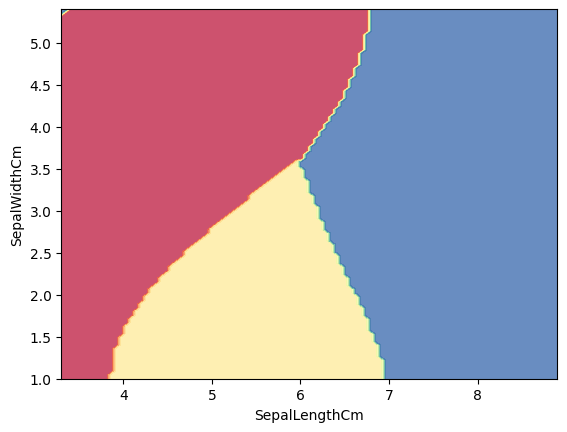

In [35]:
x=df.iloc[:,:2]
svm2 = SVC(kernel="rbf", gamma=0.5, C=1.0)
svm2.fit(x, y)
DecisionBoundaryDisplay.from_estimator(
		svm2,
		x,
		response_method="predict",
		cmap=plt.cm.Spectral,
		alpha=0.8,
	)